## 16.6 Homework

Write a program to find the minium of 
    $$ f(x,y) = x^2/2 + y^2/3 - xy/4 $$
    
- 1, from your own code (except Monte Carlo)
- 2, from scipy

I will the optimization method using the gradient descent method with variable step size:
- 1 Plot the function on 3D map
- 2 Define initialization function to initialize a starting point randomly, and then plot contour map
- 3 Define derivative function
- 4 Define minimum-finding function with variable step size
- 5 Run code to find minimum value of above function $f(x,y)$

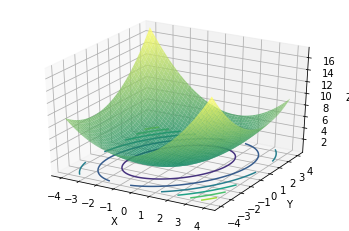

In [58]:
#%matplotlib notebook 

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#range of x and y
x_min, x_max = -4, 4                          
y_min, y_max = -4, 4                          

#Define the function
def f(x):
    return x[0]**2/2 + x[1]**2/3 -x[0]*x[1]/4

nx = np.linspace(x_min,x_max,100)
ny = np.linspace(y_min,y_max,100)

x,y = np.meshgrid(nx,ny)

z = f2([x,y])
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x,y,z, cmap='summer', alpha=0.8)
cset = ax.contour(x,y,z, zdir='z', offset=0)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

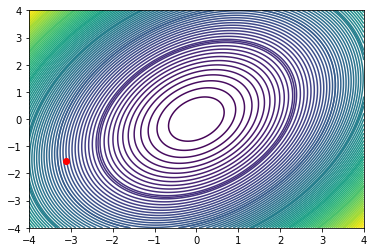

In [59]:
#Define an initialization function to assign random starting position to point.
def init(x_min, x_max, y_min, y_max):
    x0 = x_min+np.random.random()*(x_max-x_min)
    y0 = y_min+np.random.random()*(y_max-y_min)
    return [x0, y0]

nx = np.linspace(x_min,x_max,400)
ny = np.linspace(y_min,y_max,400)

"""
Below, I plot the contour map to see what it will look like when I graph the starting position.
"""
x,y = np.meshgrid(nx,ny)
z = f2([x,y])
fig = plt.figure()
levels = np.arange(np.min(z), np.max(z), 0.2)
plt.contour(x,y,z, levels=levels)
plt.contour(x,y,z)


x0, y0 = init(x_min, x_max, y_min, y_max)
plt.plot(x0, y0, 'ro')
plt.show()

In [60]:
"""
Based on the gradient descent with variable step size method, I define a function below to compute
the gradient of the function, and return the gradient as an array.

Then, I define the function "derivative" to find the minimum value of the 2d function.

"""

def derivative(f, x0, gamma=0.001):
    x, y = x0[0], x0[1]
    fx = (f([(x+gamma), y]) -f([x, y]))/gamma
    fy = (f([x, (y+gamma)])-f([x, y]))/gamma
    der = np.array([fx, fy])
    return der

#For the first iteration, I use a small, pre-defined step size "gamma" since there is not yet a previous position.
#After the first iteration is complete, the variable step-size calculation kicks in to find the variable step size according
#to the gradient calculated from the current position "x_now" and the previous position "x_prev".
#Then, I calculate "x_next" using the calculated gamma step-size.
def minimum(f, x0, N=1000):
    
    x_now = x0
    x_prev = None
    converged = False
    x_hist = []
    x_hist.append(x_now)
    
    for i in range(N):
        
        df_now = derivative(f, x_now)
        
        if x_prev is None:
            gamma = 0.001
        else:
            df_prev = derivative(f, x_prev)
            gamma = np.dot(x_now-x_prev, df_now-df_prev) / np.linalg.norm(df_now-df_prev)**2
        x_next = x_now - gamma*df_now
        
        if abs(f(x_next)-f(x_now)) < 1e-4:
            converged = True
            break
        else:
            x_prev = x_now
            x_now = x_next
            x_hist.append(x_now)
            
    return converged, np.array(x_hist), f(x_now)
    


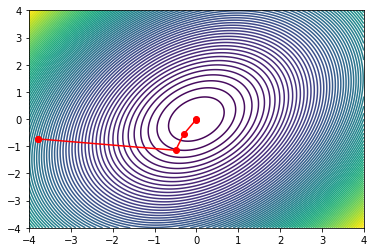

Converged =  True
Minimum =   1.099144484561923e-05
Number of iterations:   6
XY Coordinates of starting position:  [-3.77946115 -0.73038004]
Z value of starting position:  6.6298708666733885
XY Coordinates of minimum:  [-0.00431048  0.00116149]
Z value of minimum:  1.099144484561923e-05
True Z value of minimum:  0.0


In [63]:
x_min, x_max, y_min, y_max = -4, 4, -4, 4
x0 = init(x_min, x_max, y_min, y_max)
converged, x_hist, f_min = minimum(f, x0)
nx = np.linspace(x_min, x_max, 400)
ny = np.linspace(y_min, y_max, 400)
x, y = np.meshgrid(nx, ny)
z = f([x,y])
fig = plt.figure()
levels = np.arange(np.min(z), np.max(z), 0.2)
plt.contour(x,y,z, levels=levels)

plt.plot(x_hist[:,0], x_hist[:,1], 'ro-')
#plt.scatter(x_hist[-1,0], x_hist[-1,1], 'b')
plt.show()
print('Converged = ', converged)
print('Minimum =  ', f_min,)
print('Number of iterations:  ', len(x_hist))
print('XY Coordinates of starting position: ', x_hist[0])
print('Z value of starting position: ', f(x_hist[0]))
print('XY Coordinates of minimum: ', x_hist[-1])
print('Z value of minimum: ', f(x_hist[-1]))
print('True Z value of minimum: ', f([0,0]))

## Now comparing with scipy optimization package:

In [64]:
from scipy.optimize import minimize

[x0, y0] = init(x_min, x_max, y_min, y_max)
res = minimize(f, [x0,y0], method='nelder-mead', tol=1e-4, options={'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 50
         Function evaluations: 95


From the above scipy calculation, we see that our code generates a minimum value in much fewer iterations. However, both are accurate in their end result.